In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
# import matplotlib.mlab as mlab
# import sklearn as sk

%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
df = pd.read_csv('movies_data.csv')
print(df.shape)

(58788, 25)


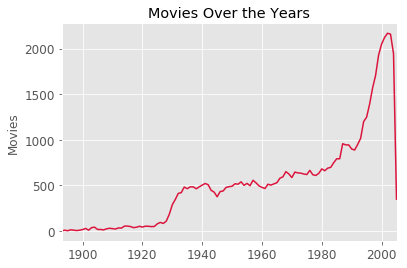

In [3]:
movies_by_years = df['year'].value_counts().sort_index()
movies_by_years.plot(fontsize=12, figsize=(6,4), color=["Crimson"])
plt.title("Movies Over the Years")
# plt.xlabel("Years")
plt.ylabel("Movies")
plt.show()

In [4]:
df[["budget", "rating", "votes"]].corr(method='pearson')
# budget and votes has mildly positive correlation, rating is not affected by budget or votes

,budget,rating,votes
budget,1.000000,-0.014229,0.441294
rating,-0.014229,1.000000,0.103707
votes,0.441294,0.103707,1.000000


In [5]:
df[["budget", "rating", "votes"]].corr(method='spearman')
# budget and votes has mildly positive correlation, rating is not affected by budget or votes

,budget,rating,votes
budget,1.000000,-0.095421,0.775659
rating,-0.095421,1.000000,0.032610
votes,0.775659,0.032610,1.000000


In [6]:
df[["budget", "rating", "votes"]].corr(method='kendall')

,budget,rating,votes
budget,1.000000,-0.064548,0.579888
rating,-0.064548,1.000000,0.025176
votes,0.579888,0.025176,1.000000


In [7]:
budget = df[df["budget"].notnull()]
budget.shape
# only 10 percent in the dataset provided budget information

(5215, 25)

In [8]:
# check the distribution of votes
df['votes'].describe().astype(int)

count     58788
mean        632
std        3829
min           5
25%          11
50%          30
75%         112
max      157608
Name: votes, dtype: int64

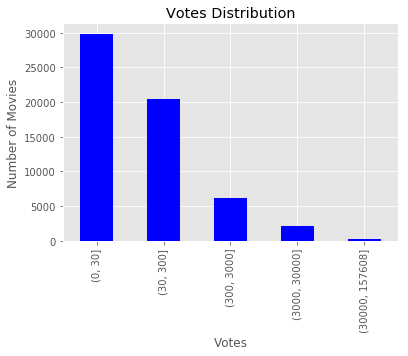

In [9]:
# visualise the distribution of votes
votes_range = [0, 30, 300, 3000, 30000, df["votes"].max()]
# votes_range = range(0, int(df["votes"].max()),int(df["votes"].max()/10))
voteSub = pd.cut(df["votes"], bins=votes_range)
vh = voteSub.value_counts(sort=False).plot.bar(rot=90, color="blue", figsize=(6,4))
vh.set_xlabel('Votes')
vh.set_ylabel('Number of Movies')
plt.title('Votes Distribution')
plt.show()

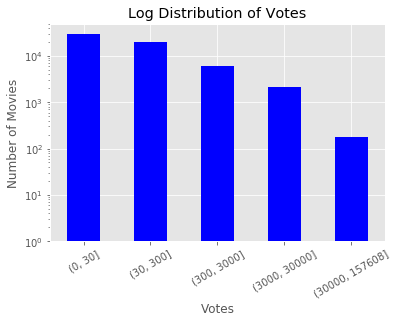

In [10]:
# visualise the distribution of votes
# votes_range = [0, 30, 150, 300, 1500, 3000, 15000, 30000, df["votes"].max()]
votes_range = [0, 30, 300, 3000, 30000, df["votes"].max()]
voteSub = pd.cut(df["votes"], bins=votes_range)
vh = voteSub.value_counts(sort=False).plot.bar(rot=30, color="blue", figsize=(6,4), log=True)
vh.set_xlabel('Votes')
vh.set_ylabel('Number of Movies')
plt.title('Log Distribution of Votes')
plt.show()

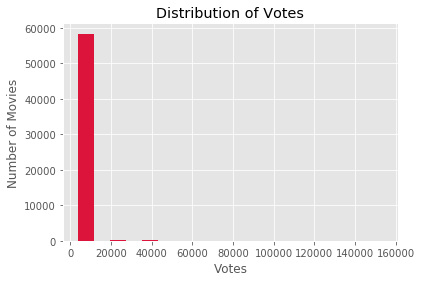

In [11]:
# votes distribution 
histo = df["votes"].hist(log= False, xrot=0, rwidth= 0.5, color =['Crimson'], figsize=(6,4))
histo.set_xlabel('Votes')
histo.set_ylabel('Number of Movies')
plt.title('Distribution of Votes')
plt.show()

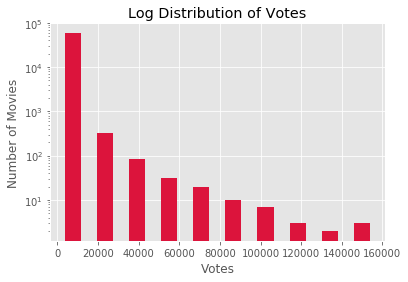

In [12]:
# votes log distribution 
histo = df["votes"].hist(log= True, xrot=0, rwidth= 0.5, color =['Crimson'], figsize=(6,4))
histo.set_xlabel('Votes')
histo.set_ylabel('Number of Movies')
plt.title('Log Distribution of Votes')
plt.show()

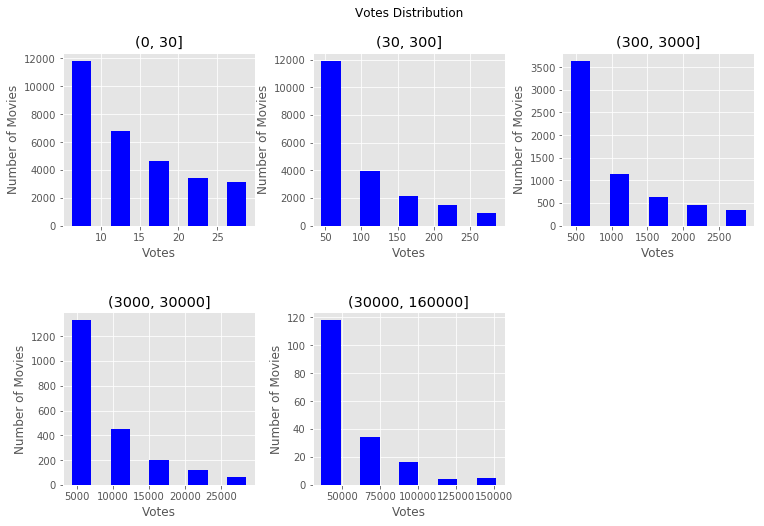

In [13]:
# another visualization of votes distribution in panels
vote_r = [0, 30, 300, 3000, 30000, 160000]
histos = df["votes"].hist(by=pd.cut(df["votes"], vote_r), xrot=360, layout=(2,3), rwidth= 0.5, figsize=(12, 8), bins=5, color=["blue"])
plt.suptitle('Votes Distribution')
for ax in histos.flatten():
    ax.set_xlabel("Votes")
    ax.set_ylabel("Number of Movies")
plt.show()

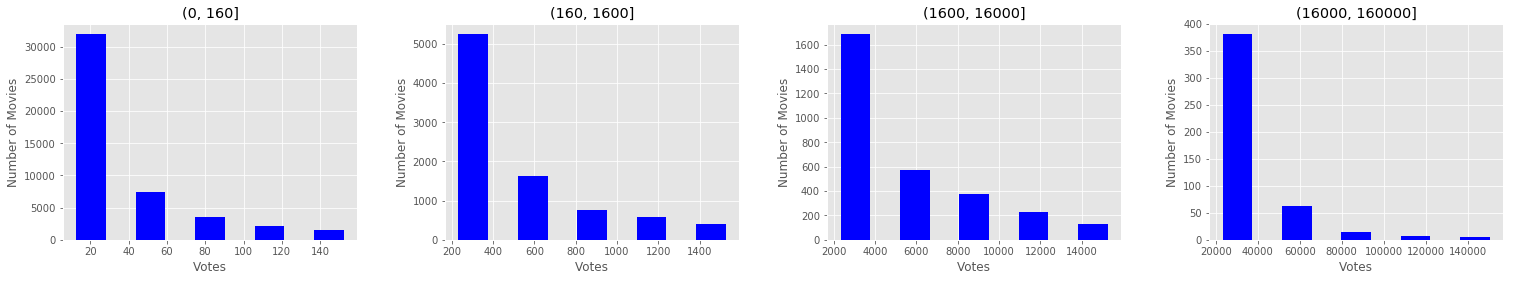

In [14]:
# another visualization of votes distribution in panels
# vote_r = [0, 30, 300, 3000, 30000, 160000]
vote_r = [0, 160, 1600, 16000, 160000]
histos = df["votes"].hist(by=pd.cut(df["votes"], vote_r), xrot=360, layout=(1,4), rwidth= 0.5, figsize=(25, 4), bins=5, color=["blue"])
# plt.suptitle('Votes Distribution')
for ax in histos.flatten():
    ax.set_xlabel("Votes")
    ax.set_ylabel("Number of Movies")
plt.show()

count    58788.000000
mean         5.931976
std          1.579101
min          1.000000
25%          5.000000
50%          6.000000
75%          7.000000
max         10.000000
Name: rating, dtype: float64

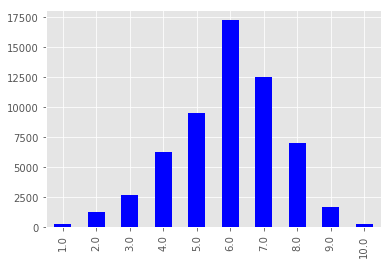

In [15]:
# general impression of rating distribution
df['rating'].round().value_counts().sort_index().plot.bar(color=['Blue'], figsize=(6,4))
df['rating'].round().describe()

In [16]:
# check whether votes < 30 and votes > 30 would affect rating
votes_lt30 = df.query('votes < 30')
votes_lt30['rating'].round().describe()

count    29365.000000
mean         5.907100
std          1.716275
min          1.000000
25%          5.000000
50%          6.000000
75%          7.000000
max         10.000000
Name: rating, dtype: float64

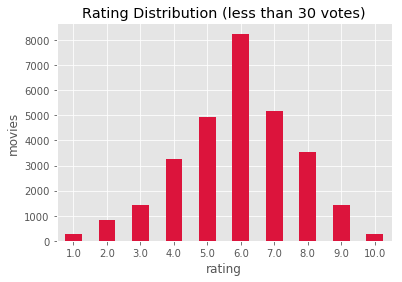

In [17]:
vlt30 = votes_lt30['rating'].round().value_counts().sort_index().plot.bar(color=['Crimson'], figsize=(6,4), rot=0.1)
plt.title("Rating Distribution (less than 30 votes)")
vlt30.set_xlabel('rating')
vlt30.set_ylabel("movies")

In [18]:
votes_gt30 = df.query('votes > 30')
votes_gt30 ['rating'].round().describe()

count    28936.000000
mean         5.959912
std          1.427512
min          1.000000
25%          5.000000
50%          6.000000
75%          7.000000
max         10.000000
Name: rating, dtype: float64

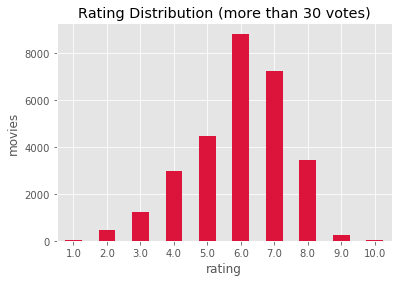

In [19]:
vgt30 = votes_gt30 ['rating'].round().value_counts().sort_index().plot.bar(color=['Crimson'], figsize=(6,4), rot = 0)
plt.title("Rating Distribution (more than 30 votes)")
vgt30.set_xlabel('rating')
vgt30.set_ylabel("movies")

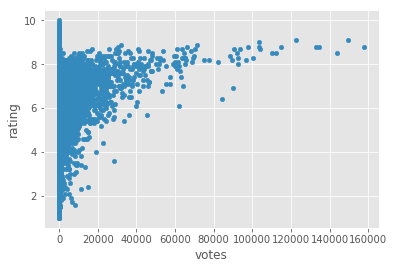

In [20]:
df.query("budget > 0").plot.scatter(x="votes", y="rating")

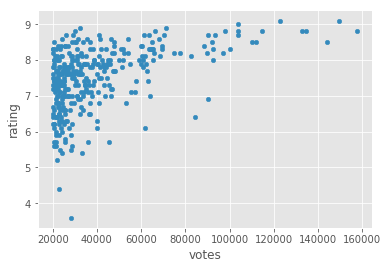

In [21]:
df.query("votes > 20000").plot.scatter(x="votes", y="rating")

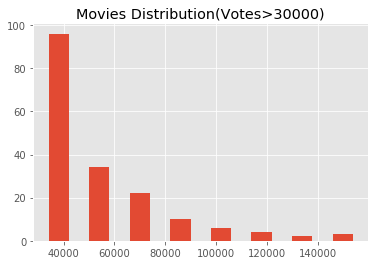

In [22]:
# the number of movies that received large votes
lgvo = plt.hist(df.query(" votes > 30000")["votes"], rwidth= 0.5, bins=8)
plt.title('Movies Distribution(Votes>30000)')
plt.show()

In [23]:
# when votes are greater than 60,000
largeVotes = df.query('votes > 60000')

In [24]:
largeVotes[["budget", "votes", "rating"]].corr()
# for high-profiled movies, rating and budget has mildly negative correlation 

,budget,votes,rating
budget,1.000000,0.066973,-0.580992
votes,0.066973,1.000000,0.420532
rating,-0.580992,0.420532,1.000000


In [25]:
largeVotes[["budget", "votes", "rating"]].corr(method='spearman')

,budget,votes,rating
budget,1.000000,0.086706,-0.478949
votes,0.086706,1.000000,0.573825
rating,-0.478949,0.573825,1.000000


In [26]:
# let's look at budget distribution
df.query("budget > 0")["budget"].describe().astype(int)

count         5183
mean      13495322
std       23398196
min           1000
25%         275000
50%        3000000
75%       15000000
max      200000000
Name: budget, dtype: int64

In [27]:
df.query("budget > 0")["budget"].median()

3000000.0

In [28]:
# another visualization of buget distribution in panels
# bgt_r = range(0, int(df["budget"].max()), int(df["budget"].max()/5))
# bgt_histos = df["budget"].hist(by=pd.cut(df["budget"], bgt_r), xrot=360, layout=(2,3), rwidth= 0.5, figsize=(12, 8), bins=8, color=["blue"])
# plt.suptitle('Budget Distribution')
# for ax in bgt_histos.flatten():
#     ax.set_xlabel("Budget")
#     ax.set_ylabel("Number of Movies")
# plt.show()

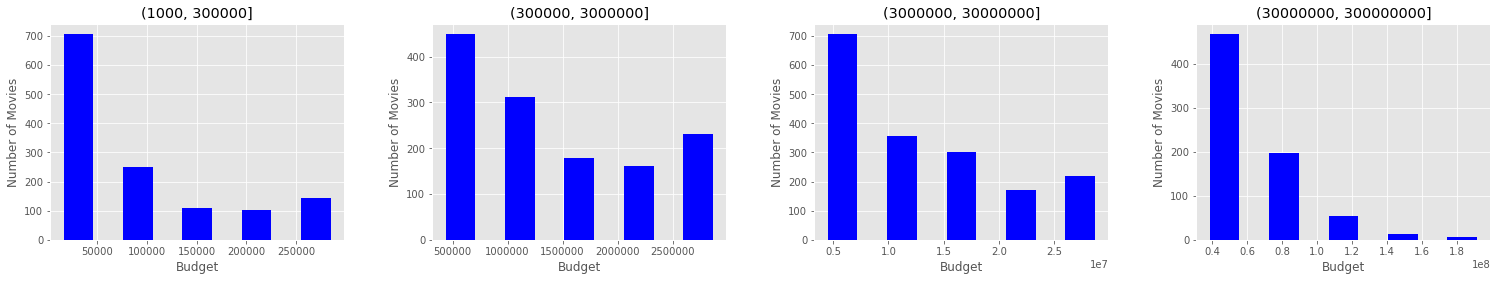

In [29]:
# another visualization of buget distribution in panels
bgt_r = [1000, 300000, 3000000, 30000000, 300000000]
bgt_histos = df["budget"].hist(by=pd.cut(df["budget"], bgt_r), xrot=360, layout=(1,4), rwidth= 0.5, figsize=(25, 4), bins=5, color=["blue"])
# plt.suptitle('Budget Distribution')
for ax in bgt_histos.flatten():
    ax.set_xlabel("Budget")
    ax.set_ylabel("Number of Movies")
plt.show()

0
25000000
50000000
75000000
100000000
125000000
150000000
175000000


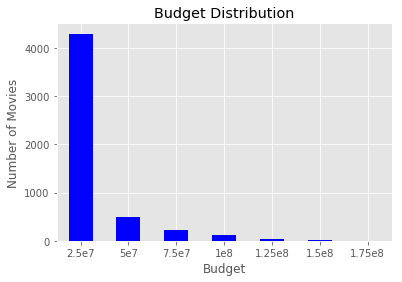

In [30]:
# visualise the distribution of budget
bgt_range = range(0, int(df["budget"].max()), int(df["budget"].max()/8))
for i in bgt_range:
    print(i)
    
bgt_labels = ['2.5e7', '5e7', '7.5e7', '1e8', '1.25e8', '1.5e8', '1.75e8']
bgtSub = pd.cut(df["budget"], bins=bgt_range)
bgth = bgtSub.value_counts(sort=False).plot.bar(rot=0, color="blue", figsize=(6,4))
bgth.set_xlabel('Budget')
bgth.set_ylabel('Number of Movies')
bgth.xaxis.set_ticklabels(bgt_labels)
plt.title('Budget Distribution')
plt.show()

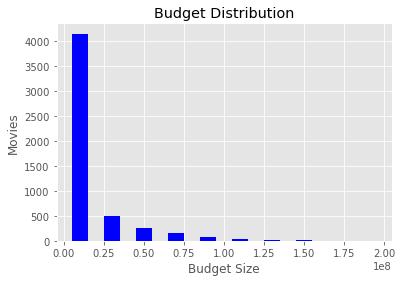

In [31]:
# overview of budget size and the amounts of movies
plt.hist(df.query("budget > 0")["budget"], log= False, bins=10, rwidth= 0.5, color=['Blue'])
plt.figsize=(6,4)
plt.title("Budget Distribution")
plt.xlabel("Budget Size")
plt.ylabel("Movies")
plt.show()

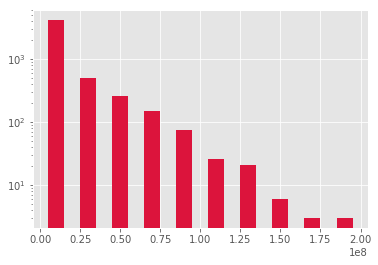

In [32]:
# overview of budget size and the amounts of movies
plt.hist(df.query("budget > 0")["budget"], log= True, rwidth= 0.5, color=['Crimson'])
plt.figsize=(6,4)
plt.show()

count    2.688000e+03
mean     7.320078e+05
std      8.831008e+05
min      1.000000e+03
25%      5.000000e+04
50%      3.000000e+05
75%      1.100000e+06
max      3.000000e+06
Name: budget, dtype: float64


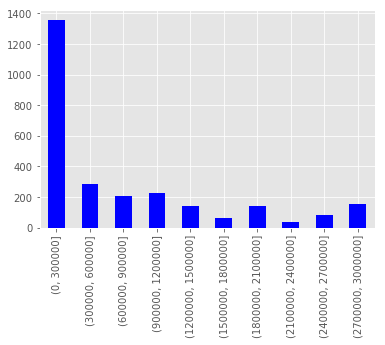

In [33]:
# lower half budget subset
lowBudget = df.query("budget > 0 & budget < 3000001")["budget"]
print(lowBudget.describe())
lowBudgetRange = range(0, 3000001, 300000)

budget1 = pd.cut(df["budget"], bins= lowBudgetRange)
budget1.value_counts(sort=False).plot.bar(rot=90, color="b", figsize=(6,4))
plt.show()

count    2.495000e+03
mean     2.724594e+07
std      2.778432e+07
min      3.180000e+06
25%      7.500000e+06
50%      1.600000e+07
75%      3.800000e+07
max      2.000000e+08
Name: budget, dtype: float64


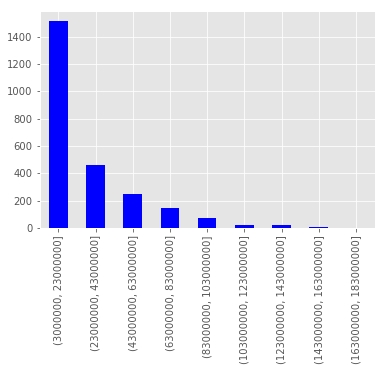

In [34]:
# upper half budget subset
highBudget = df.query(" budget > 3000000")["budget"]
print(highBudget.describe())
highBudgetRange = range(3000000, 200000001, 20000000)

budget2 = pd.cut(df["budget"], bins= highBudgetRange)
budget2.value_counts(sort=False).plot.bar(rot=90, color="b", figsize=(6,4))
plt.show()

In [35]:
# recommend a genre to a startup studio 

genres = ["Action", "Animation", "Comedy", "Drama", "Documentary", "Romance", "Short"]
gsum = []

for i in range(len(genres)):
    g = genres[i]
    gdf = df.loc[df[g] == 1]
    s = gdf["rating"]
    vot = df.loc[df[g]==1]["votes"]
    gsum.append({"genre":g, "rating_counts":s.count(), "rating_mean": s.mean().round(2), "rating_std":s.std().round(2), "rating_25%":s.quantile(0.25),"rating_50%":s.quantile(0.5),"rating_75%":s.quantile(0.75), "rating_max": s.max(), "votes_counts":vot.count(), "votes_mean": vot.mean().round(2), "votes_std":vot.std().round(2), "votes_25%":vot.quantile(0.25),"votes_50%":vot.quantile(0.5),"votes_75%":vot.quantile(0.75), "votes_max": vot.max()})


gsumdf = pd.DataFrame(gsum)
trans = gsumdf.transpose()
# trans.columns = trans.iloc[4]
# trans = trans.drop(['genre'])
trans

# verification
# df[df['Action']==1]["votes"].describe()

,0,1,2,3,4,5,6
genre,Action,Animation,Comedy,Drama,Documentary,Romance,Short
rating_25%,4.2,6,5.1,5.4,5.8,5.4,5.6
rating_50%,5.4,6.7,6.1,6.3,6.9,6.3,6.6
rating_75%,6.4,7.3,7,7.1,7.725,7,7.5
rating_counts,4688,3690,17271,21811,3472,4744,9458
rating_max,9.8,9.8,10,10,9.9,9.9,10
rating_mean,5.29,6.58,5.96,6.15,6.65,6.16,6.48
rating_std,1.56,1.17,1.46,1.38,1.63,1.3,1.55
votes_25%,21,10,15,15,8,21,8
votes_50%,74,21,39,44,16,82,14


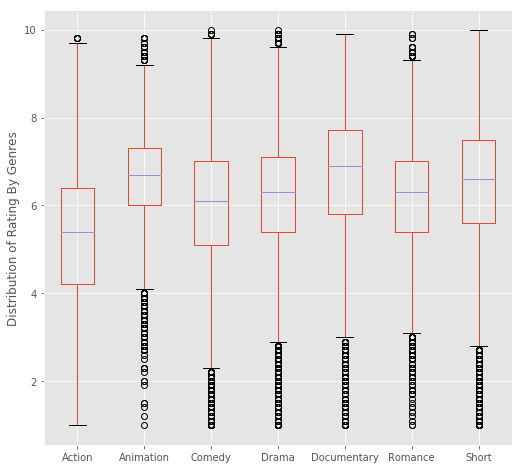

In [36]:
# visualize the distribution of rating by genre

superSeries = []
for i in range(len(genres)):
    g = genres[i]
    series = df.loc[df[g] == 1]["rating"]
    superSeries.append(series)

boxes = pd.DataFrame(superSeries, index = genres)

mb = boxes.T.boxplot(vert=True, figsize=(10,8))
mb.set_ylabel('Distribution of Rating By Genres')
plt.subplots_adjust(left=0.25)
plt.show()


In [37]:
budgetdf = df.query("budget > 0 and budget < 1000000")
# print(budgetdf.shape)
bugSum = []

for i in range(len(genres)):
    g = genres[i]
    gdf = budgetdf.loc[df[g] == 1]
    print(gdf.shape)
    s = gdf["rating"]
    v = budgetdf.loc[df[g]==1]["votes"]
    bugSum.append({"genre":g, "rating_counts":s.count(), "rating_mean": s.mean().round(2), "rating_std":s.std().round(2), "rating_25%":s.quantile(0.25),"rating_50%":s.quantile(0.5),"rating_75%":s.quantile(0.75), "rating_max": s.max(), "votes_counts":v.count(), "votes_mean": v.mean().round(2), "votes_std":v.std().round(2), "votes_25%":v.quantile(0.25),"votes_50%":v.quantile(0.5),"votes_75%":v.quantile(0.75), "votes_max": v.max()})


bugSumdf = pd.DataFrame(bugSum)
trans2 = bugSumdf.transpose()
# trans.columns = trans.iloc[4]
# trans = trans.drop(['genre'])
trans2

(138, 25)
(25, 25)
(537, 25)
(735, 25)
(102, 25)
(182, 25)
(408, 25)


,0,1,2,3,4,5,6
genre,Action,Animation,Comedy,Drama,Documentary,Romance,Short
rating_25%,4.5,6.2,5.5,5.6,6.325,5.9,6.5
rating_50%,5.7,7.4,6.7,6.7,7.5,6.8,7.6
rating_75%,6.875,7.6,7.6,7.55,8.2,7.5,8.8
rating_counts,138,25,537,735,102,182,408
rating_max,9.8,9.6,9.9,10,9.8,9.6,10
rating_mean,5.69,7.04,6.46,6.54,7.04,6.63,7.35
rating_std,1.71,1.47,1.74,1.61,1.82,1.38,1.85
votes_25%,17,24,12,14,8,32,6
votes_50%,36.5,68,46,54,21,101,10


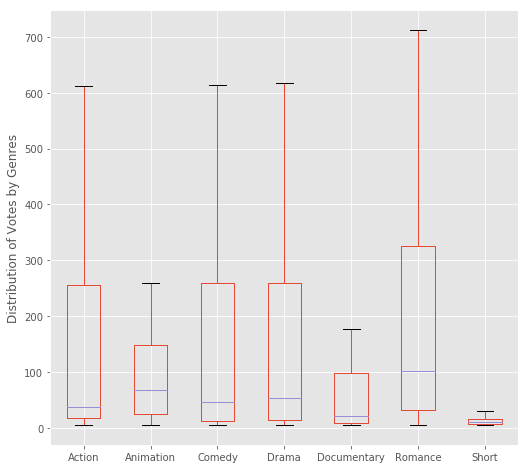

In [38]:
bgvSeries = []
for i in range(len(genres)):
    g = genres[i]
    series = budgetdf.loc[df[g] == 1]["votes"]
    bgvSeries.append(series)

boxes = pd.DataFrame(bgvSeries, index = genres)

mb2 = boxes.T.boxplot(vert=True, figsize=(10,8),showfliers=False)
mb2.set_ylabel('Distribution of Votes by Genres')
plt.subplots_adjust(left=0.25)
plt.show()

In [39]:
df.iloc[0:5001].query('budget > 0')

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
21,22,'G' Men,1935,85,450000.0,7.2,281,0.0,4.5,4.5,...,4.5,4.5,NaN,0,0,0,1,0,0,0
34,35,'Manos' the Hands of Fate,1966,74,19000.0,1.6,7996,74.5,4.5,4.5,...,4.5,14.5,NaN,0,0,0,0,0,0,0
47,48,'Til There Was You,1997,113,23000000.0,4.8,799,4.5,4.5,4.5,...,4.5,14.5,PG-13,0,0,1,0,0,1,0
90,91,.com for Murder,2002,96,5000000.0,3.7,271,64.5,4.5,4.5,...,4.5,4.5,NaN,0,0,0,0,0,0,0
111,112,10 Things I Hate About You,1999,97,16000000.0,6.7,19095,4.5,4.5,4.5,...,14.5,14.5,PG-13,0,0,1,0,0,1,0
123,124,100 Mile Rule,2002,98,1100000.0,5.6,181,4.5,4.5,4.5,...,4.5,14.5,R,0,0,1,0,0,0,0
125,126,100 Proof,1997,94,140000.0,3.3,19,14.5,14.5,4.5,...,0.0,24.5,NaN,0,0,0,1,0,0,0
138,139,101,1989,117,200000.0,7.8,299,4.5,0.0,4.5,...,14.5,45.5,NaN,0,0,0,0,1,0,0
142,143,101-vy kilometer,2001,103,200000.0,5.8,7,0.0,0.0,14.5,...,0.0,24.5,NaN,0,0,0,1,0,0,0
144,145,102 Dalmatians,2000,100,85000000.0,4.7,1987,4.5,4.5,14.5,...,4.5,4.5,NaN,0,0,1,0,0,0,0
